# Equivalence

This notebook investigates the curious result presented by Stand-up Maths in ["The unexpected probability result confusing everyone"](https://youtu.be/ga9Qk38FaHM).
The "tl;dr", as far as I can tell, goes a little something like this: $$\text{max}(n\text{d}m) \equiv \text{ceil}\left[ \text{rand}([1,m^n]) ^{1/n}\right] .$$

In [1]:
# imports and configurations
import time
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# configure plotting style
plt.style.use(['default', 'cstyle.mplstyle'])

# configure figure save directory
fig_dir = Path('figures')
fig_dir.mkdir(exist_ok=True)

In [2]:
# define a dice-like random function
def roll(n: int, d: int, rng: np.random.Generator = None) -> np.array:
    # load the RNG
    if rng is None:
        rng = np.random.default_rng()

    # roll n d d (ex: 1d6)
    rolls = rng.integers(low=1, high=d, size=n, endpoint=True)
    return rolls

## Examples using 1000 d6's

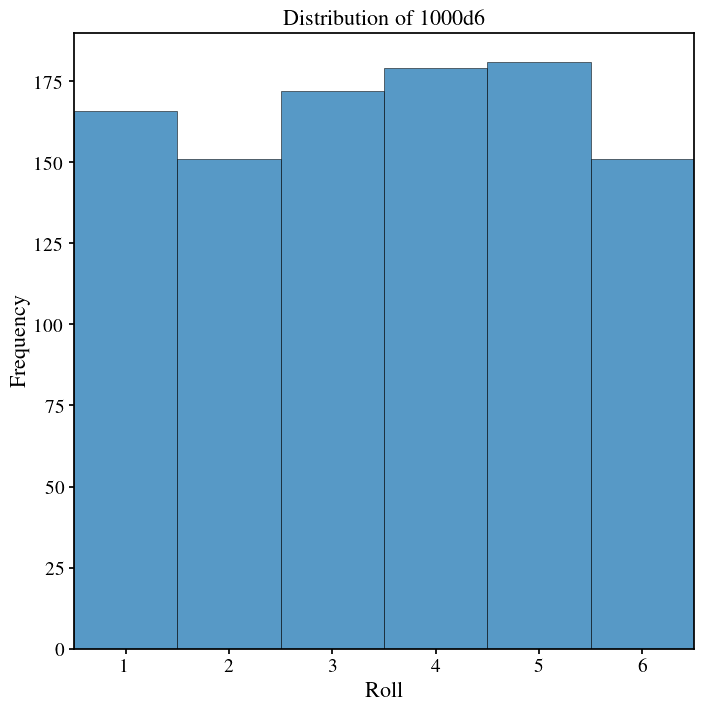

In [3]:
# plot the distribution of 100d6
dice_sides = 6
times = 1000

# define the figure
fig, ax = plt.subplots()

# plot the histogram
rolls = roll(times, dice_sides)
bins = np.arange(0.5, (dice_sides+1.5), 1)
ax.hist(rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75)

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of {times}d{dice_sides}")

# save the figure
fig.savefig(fig_dir / 'dice_distribution')

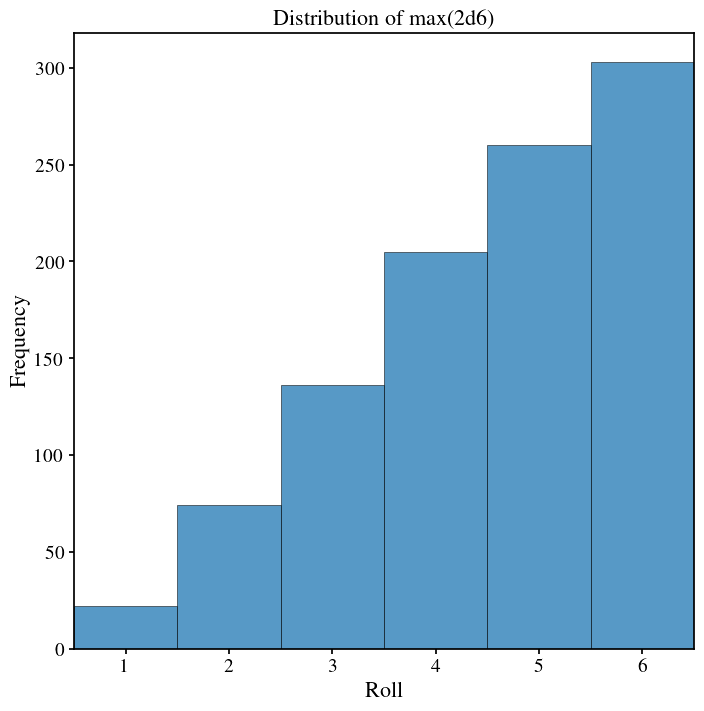

In [4]:
# plot the distribution of the max(2d6) preformed 1000 times
dice_sides = 6
dice_rolls = 2
times = 1000

# define the figure
fig, ax = plt.subplots()

# plot the histogram
rolls = np.max(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
bins = np.arange(0.5, (dice_sides+1.5), 1)
ax.hist(rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75)

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of max({dice_rolls}d{dice_sides})")

# save the figure
fig.savefig(fig_dir / 'max_dice_distribution')

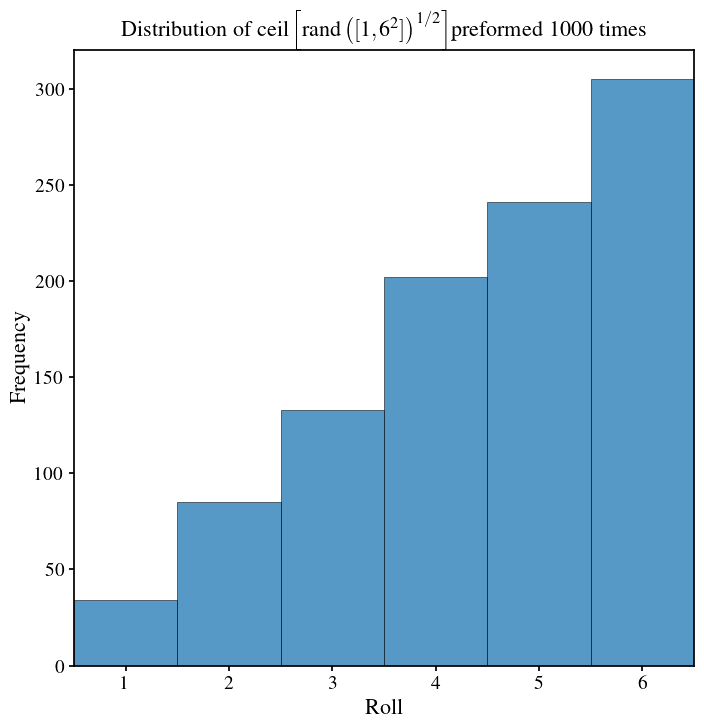

In [5]:
# plot the equivalent of max(2d6) as defined in the title markdown
dice_sides = 6
dice_rolls = 2
times = 1000

# define the figure
fig, ax = plt.subplots()

# plot the histogram
rolls = np.ceil(np.power(roll(times, dice_sides ** dice_rolls), 1/dice_rolls))
bins = np.arange(0.5, (dice_sides+1.5), 1)
ax.hist(rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75)

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
equation = r"$\text{ceil}\left[\text{rand}\left( [1,6^2] \right)^{1/2}\right]$"
ax.set_title(r"Distribution of " + equation + f"preformed {times} times")

# save the figure
fig.savefig(fig_dir / 'max_dice_distribution_equivalent')

## Generalization to max(ndm)

In [6]:
# define n and m
n = 3
m = 20

In [7]:
# generate data
dice_sides = m
dice_rolls = n
times = int(1e6)

# generate max(ndm) and time how long it takes
start = time.time()
max_rolls = np.max(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
max_elapsed = time.time() - start
print(f"Generation of {times:g} max({n}d{m}) took {max_elapsed:.2f} seconds")

# generate the equivalent of max(ndm) and time how long it takes
start = time.time()
equivalent_rolls = np.ceil(np.power(roll(times, dice_sides ** dice_rolls), 1/dice_rolls))
equivalent_elapsed = time.time() - start
print(f"Generation of {times:g} equivalent took {equivalent_elapsed:.2f} seconds")

Generation of 1e+06 max(3d20) took 0.05 seconds
Generation of 1e+06 equivalent took 0.03 seconds


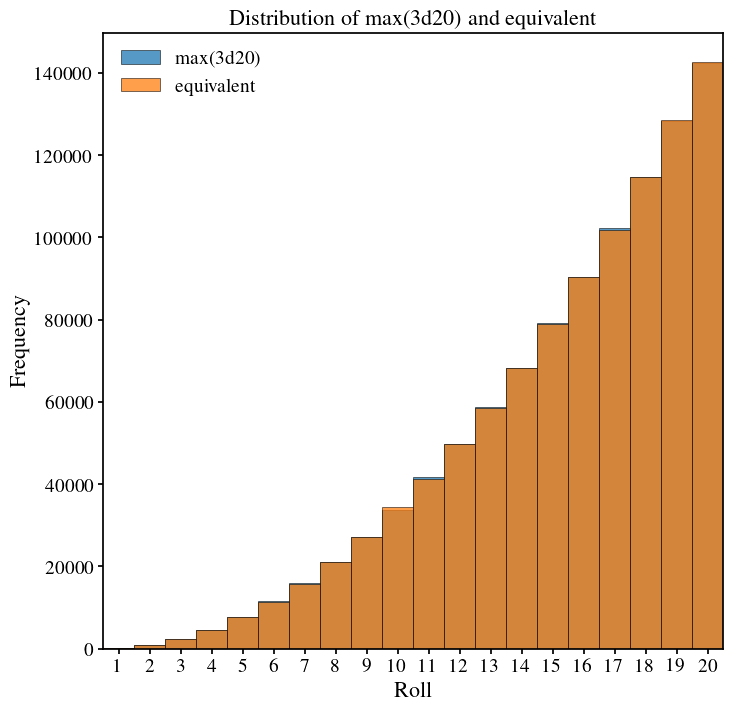

In [8]:
# plot a comparison of max and equivalent methods
# define the figure
fig, ax = plt.subplots()

# generate data
dice_sides = m
dice_rolls = n
times = int(1e6)
max_rolls = np.max(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
equivalent_rolls = np.ceil(np.power(roll(times, dice_sides ** dice_rolls), 1/dice_rolls))
bins = np.arange(0.5, (dice_sides+1.5), 1)

# plot the histogram
ax.hist(max_rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75, label=f"max({n}d{m})")
ax.hist(equivalent_rolls, bins=bins, facecolor='tab:orange', edgecolor='black', linewidth=0.5, alpha=0.75, label=f"equivalent")

# make sure the x-axis prints integers from 1 to m
ax.set_xticks(np.arange(1, m+1, 1))

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of max({n}d{m}) and equivalent")
ax.legend()

# save the figure
fig.savefig(fig_dir / 'max_dice_distribution_comparison')

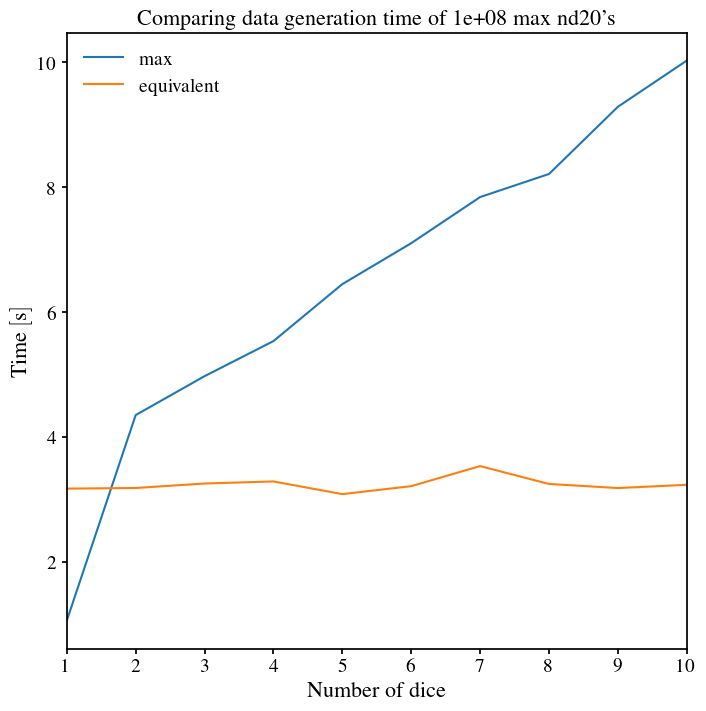

In [9]:
# plot a comparison of the time difference in generating data sweeping over n
# define the figure
fig, ax = plt.subplots()

# define the range of n
n = np.arange(1, 11, 1)

# generate data
dice_sides = 20
times = int(1e8)
max_elapsed = []
equivalent_elapsed = []
for n_ in n:
    dice_rolls = n_
    start = time.time()
    max_rolls = np.max(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
    max_elapsed.append(time.time() - start)
    start = time.time()
    equivalent_rolls = np.ceil(np.power(roll(times, dice_sides ** dice_rolls), 1/dice_rolls))
    equivalent_elapsed.append(time.time() - start)

# plot the histogram
ax.plot(n, max_elapsed, color='tab:blue', label="max")
ax.plot(n, equivalent_elapsed, color='tab:orange', label="equivalent")

# set the labels
ax.set_xlabel(f"Number of dice")
ax.set_ylabel(r"Time " + r"$\left[\qty{}{\second}\right]$")
ax.set_title(f"Comparing data generation time of {times:g} max nd{dice_sides}'s")
ax.legend()

# save the figure
fig.savefig(fig_dir / 'max_dice_generation_time_comparison')

## Test for min Equivalence

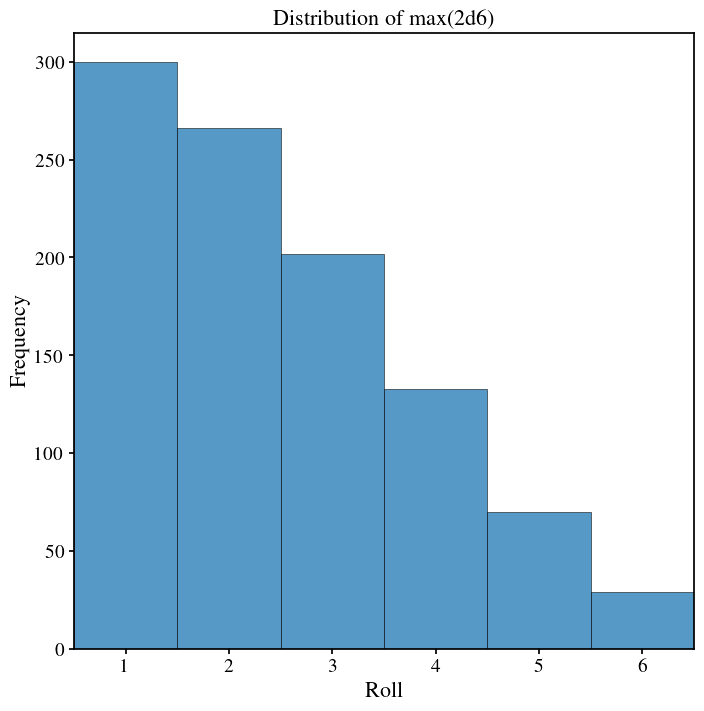

In [10]:
# plot the distribution of the min(2d6) preformed 1000 times
dice_sides = 6
dice_rolls = 2
times = 1000

# define the figure
fig, ax = plt.subplots()

# plot the histogram
rolls = np.min(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
bins = np.arange(0.5, (dice_sides+1.5), 1)
ax.hist(rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75)

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of max({dice_rolls}d{dice_sides})")

# save the figure
fig.savefig(fig_dir / 'min_dice_distribution')

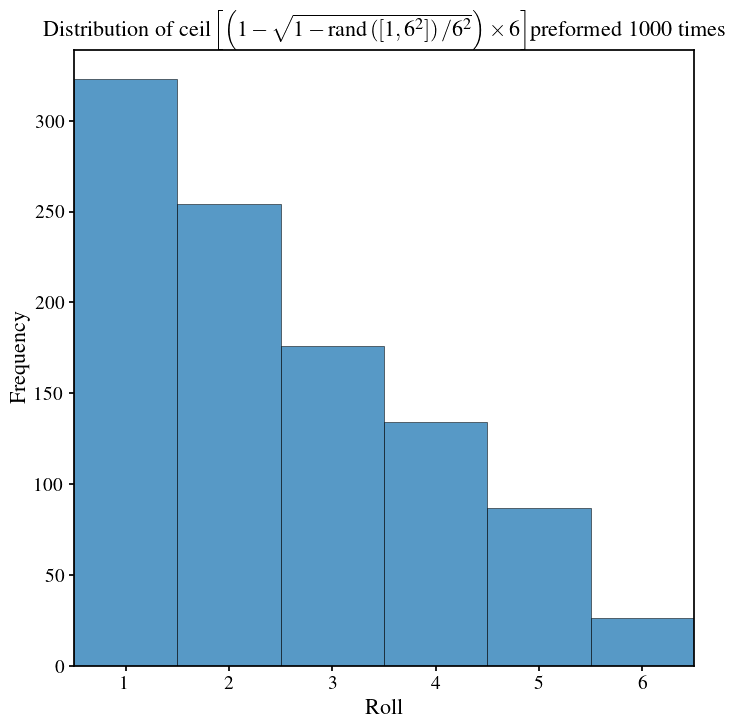

In [11]:
# plot the equivalent of min(2d6)
dice_sides = 6
dice_rolls = 2
times = 1000

# define the figure
fig, ax = plt.subplots()

# plot the histogram
equivalent_sides = dice_sides ** dice_rolls
rolls = roll(times, equivalent_sides)
rolls = np.ceil((1 - np.sqrt(1 - rolls/equivalent_sides)) * dice_sides)
bins = np.arange(0.5, (dice_sides+1.5), 1)
ax.hist(rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75)

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
equation = r"$\text{ceil}\left[\left(1 - \sqrt{1 - \text{rand}\left( [1,6^2] \right)/6^2}\right) \times 6\right]$"
ax.set_title(r"Distribution of " + equation + f"preformed {times} times")

# save the figure
fig.savefig(fig_dir / 'min_dice_distribution_equivalent')

## Generalization to min(ndm)

In [12]:
# define n and m
n = 3
m = 20

In [13]:
# generate data
dice_sides = m
dice_rolls = n
times = int(1e6)

# generate min(ndm) and time how long it takes
start = time.time()
min_rolls = np.min(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
min_elapsed = time.time() - start
print(f"Generation of {times:g} min({n}d{m}) took {min_elapsed:.2f} seconds")

# generate the equivalent of min(ndm) and time how long
start = time.time()
equivalent_sides = dice_sides ** dice_rolls
equivalent_rolls = roll(times, equivalent_sides)
equivalent_rolls = np.ceil((1 - np.power((1 - equivalent_rolls/equivalent_sides), 1/dice_rolls)) * dice_sides)
equivalent_elapsed = time.time() - start
print(f"Generation of {times:g} equivalent took {equivalent_elapsed:.2f} seconds")

Generation of 1e+06 min(3d20) took 0.05 seconds
Generation of 1e+06 equivalent took 0.07 seconds


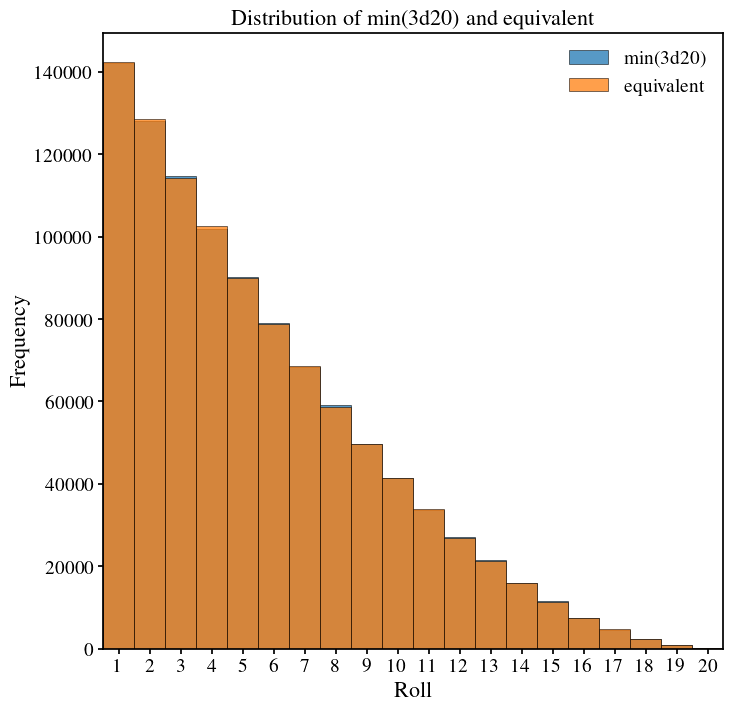

In [14]:
# plot a comparison of min and equivalent methods
# define the figure
fig, ax = plt.subplots()

# generate data
dice_sides = m
dice_rolls = n
times = int(1e6)
min_rolls = np.min(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
equivalent_sides = dice_sides ** dice_rolls
equivalent_rolls = roll(times, equivalent_sides)
equivalent_rolls = np.ceil((1 - np.power((1 - equivalent_rolls/equivalent_sides), 1/dice_rolls)) * dice_sides)
bins = np.arange(0.5, (dice_sides+1.5), 1)

# plot the histogram
ax.hist(min_rolls, bins=bins, facecolor='tab:blue', edgecolor='black', linewidth=0.5, alpha=0.75, label=f"min({n}d{m})")
ax.hist(equivalent_rolls, bins=bins, facecolor='tab:orange', edgecolor='black', linewidth=0.5, alpha=0.75, label=f"equivalent")

# make sure the x-axis prints integers
ax.set_xticks(np.arange(1, m+1, 1))

# set the labels
ax.set_xlabel("Roll")
ax.set_ylabel("Frequency")
ax.set_title(f"Distribution of min({n}d{m}) and equivalent")
ax.legend()

# save the figure
fig.savefig(fig_dir / 'min_dice_distribution_comparison')

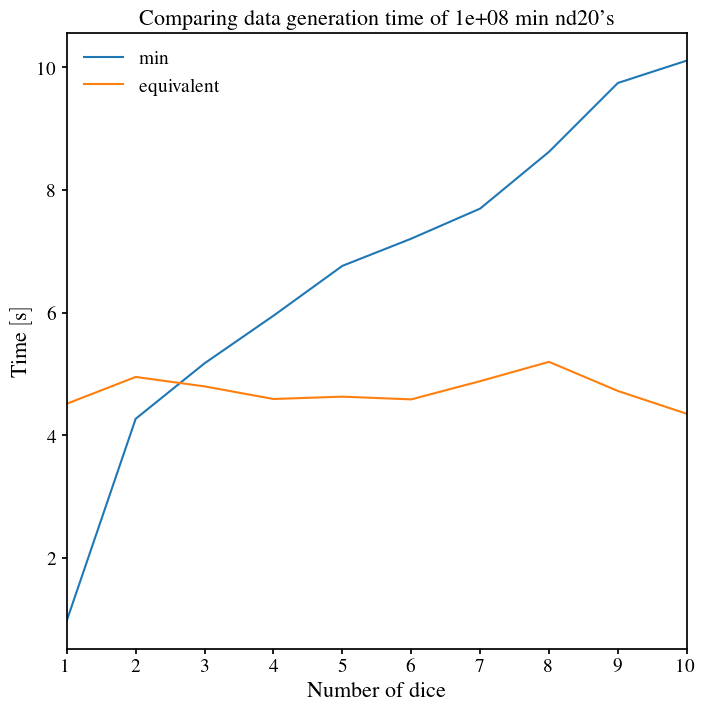

In [15]:
# plot a comparison of the time difference in generating data sweeping over n
# define the figure
fig, ax = plt.subplots()

# define the range of n
n = np.arange(1, 11, 1)

# generate data
dice_sides = 20
times = int(1e8)
min_elapsed = []
equivalent_elapsed = []
for n_ in n:
    dice_rolls = n_
    start = time.time()
    min_rolls = np.min(roll(times * dice_rolls, dice_sides).reshape(times, dice_rolls), axis=1)
    min_elapsed.append(time.time() - start)
    start = time.time()
    equivalent_sides = dice_sides ** dice_rolls
    equivalent_rolls = roll(times, equivalent_sides)
    equivalent_rolls = np.ceil((1 - np.power((1 - equivalent_rolls/equivalent_sides), 1/dice_rolls)) * dice_sides)
    equivalent_elapsed.append(time.time() - start)

# plot the histogram
ax.plot(n, min_elapsed, color='tab:blue', label="min")
ax.plot(n, equivalent_elapsed, color='tab:orange', label="equivalent")

# set the labels
ax.set_xlabel(f"Number of dice")
ax.set_ylabel(r"Time " + r"$\left[\qty{}{\second}\right]$")
ax.set_title(f"Comparing data generation time of {times:g} min nd{dice_sides}'s")
ax.legend()

# save the figure
fig.savefig(fig_dir / 'min_dice_generation_time_comparison')